In [1]:
import time

from neurosky import Connector, Processor

connector = Connector(verbose=True)
processor = Processor()

connector.start()  # Start the connector thread, which will start the data stream.

connector.data.subscribe(processor.add_data)
processor.data.subscribe(print)

time.sleep(10)
processor.close()
connector.close()


Retrieving data...
250
[ 92406.           1108.74138971   6997.53707526    642.14022192
   2459.31923805   2524.88436084   4490.89679641    533.97228211
   1924.51717547   2831.50972916   6614.19264174   2600.16660638
   1482.34812484    490.55122226   1660.91630295   7912.63863438
   7951.82330735   1681.16217239    558.90035131   5707.11013488
   1506.8845961   29167.31111019  26949.38055809  34335.15584418
  54309.80872018 194989.1459118   22717.0934856    1853.18477899
  15925.25931784   2628.88440455  12156.20380198   7480.24372866
  10070.86709053   1820.87931425   6508.1668632    7852.47366493
   2454.82240178   4478.16305605   6301.13841269   1420.38969775
   9224.56520648  13499.61904082  16388.21776663   1988.59608403
   2271.98512919   4052.29768762  11308.73702487  33807.23352037
  37189.65137157   7881.58989868]
250
[100195.           3848.92801326    764.36996863   3403.48806123
   1052.9257196    2344.07277399  11506.72217264   2108.21616663
   2658.96074164   1684.96454

In [ ]:
 250 — это количество отсчетов или, возможно, код типа пакета/события.

Массив чисел [...] — это спектральные характеристики ЭЭГ-сигнала (видимо, мощности в определённых диапазонах), полученные с устройства.

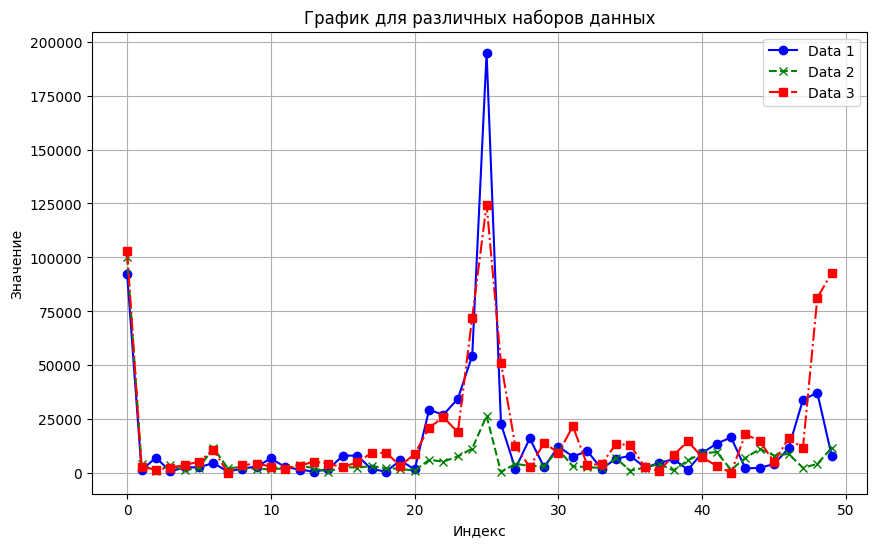

In [5]:
import matplotlib.pyplot as plt

# Определяем константы для данных
DATA_1 = [
    92406.0, 1108.74138971, 6997.53707526, 642.14022192,
    2459.31923805, 2524.88436084, 4490.89679641, 533.97228211,
    1924.51717547, 2831.50972916, 6614.19264174, 2600.16660638,
    1482.34812484, 490.55122226, 1660.91630295, 7912.63863438,
    7951.82330735, 1681.16217239, 558.90035131, 5707.11013488,
    1506.8845961, 29167.31111019, 26949.38055809, 34335.15584418,
    54309.80872018, 194989.1459118, 22717.0934856, 1853.18477899,
    15925.25931784, 2628.88440455, 12156.20380198, 7480.24372866,
    10070.86709053, 1820.87931425, 6508.1668632, 7852.47366493,
    2454.82240178, 4478.16305605, 6301.13841269, 1420.38969775,
    9224.56520648, 13499.61904082, 16388.21776663, 1988.59608403,
    2271.98512919, 4052.29768762, 11308.73702487, 33807.23352037,
    37189.65137157, 7881.58989868
]

DATA_2 = [
    100195.0, 3848.92801326, 764.36996863, 3403.48806123,
    1052.9257196, 2344.07277399, 11506.72217264, 2108.21616663,
    2658.96074164, 1684.96454946, 1663.15446117, 2043.72467979,
    3597.17026789, 1943.82739759, 493.15887291, 2611.84004924,
    2424.23515116, 3066.34623626, 2173.95686788, 1775.65111132,
    981.20750199, 5971.9867768, 5192.0489976, 7592.74907902,
    11223.78629178, 26331.27436419, 283.71979771, 4132.03548379,
    3154.42603068, 3093.43066908, 10751.1487494, 2937.42558174,
    2621.55264449, 2216.18837578, 6734.82673872, 892.77972161,
    2414.11589466, 3999.41950063, 1094.03264064, 5765.88974964,
    8955.54441656, 9601.63841394, 1387.73768214, 6879.86924691,
    11047.25163354, 7958.32492481, 8720.32748842, 2305.11450384,
    4062.07670515, 11591.68162661
]

DATA_3 = [
    1.02919000e+05, 2.68816566e+03, 1.44771046e+03, 2.37514067e+03,
    3.57108082e+03, 5.14132942e+03, 1.06342589e+04, 5.00454197e+01,
    3.45471373e+03, 4.27305768e+03, 2.83604746e+03, 1.87925737e+03,
    3.25223067e+03, 5.20174465e+03, 4.22876159e+03, 2.50275953e+03,
    4.92182293e+03, 9.09188175e+03, 9.31016610e+03, 3.21093012e+03,
    8.71107426e+03, 2.09378917e+04, 2.57641014e+04, 1.87030520e+04,
    7.20235619e+04, 1.24486672e+05, 5.09351876e+04, 1.23843991e+04,
    2.72433929e+03, 1.37843042e+04, 9.24216033e+03, 2.15727914e+04,
    3.61827905e+03, 4.04008435e+03, 1.33078145e+04, 1.29195235e+04,
    2.48671374e+03, 7.62416911e+02, 8.07721673e+03, 1.46437059e+04,
    7.13774427e+03, 3.18984831e+03, 3.26466652e+00, 1.79195220e+04,
    1.46707260e+04, 4.93046471e+03, 1.60113905e+04, 1.14512709e+04,
    8.11863568e+04, 9.27352538e+04
]

# Создаем график
plt.figure(figsize=(10, 6))

# Строим графики для каждого набора данных
plt.plot(DATA_1, label='Data 1', color='b', linestyle='-', marker='o')
plt.plot(DATA_2, label='Data 2', color='g', linestyle='--', marker='x')
plt.plot(DATA_3, label='Data 3', color='r', linestyle='-.', marker='s')

# Добавляем подписи и заголовки
plt.title('График для различных наборов данных')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()

# Показываем график
plt.grid(True)
plt.show()


In [7]:
import time

from neurosky import Connector, Processor

connector = Connector(verbose=True)
processor = Processor()

connector.start()  # Start the connector thread, which will start the data stream.

connector.data.subscribe(processor.add_data)
processor.data.subscribe(print)

time.sleep(10)
processor.close()
connector.close()

Retrieving data...
250
[8.28500000e+03 2.77323320e+00 8.22015129e+00 8.36110436e+00
 3.91441272e+00 1.05714049e+00 6.95570734e-01 5.07330768e+00
 6.82723346e+00 1.51617278e+00 3.61965388e-01 5.62610449e+00
 1.68509850e+01 1.23556813e+01 3.25068025e+00 7.61626411e+00
 8.35334683e+00 2.21133182e+00 5.02688460e+00 7.87157933e+00
 7.76663053e+00 1.21346858e+01 1.77911030e+00 4.34509743e+00
 4.88216157e+00 8.09016994e-01 1.05689257e+01 7.06107563e-01
 6.10898256e+00 1.16829865e+01 8.11643603e+00 2.94603977e+00
 6.89496119e+00 5.05724793e+00 6.23848972e+00 1.28110277e+00
 6.33890302e+00 1.08609139e+01 2.56383368e+00 2.00103159e+00
 1.11468153e+00 1.10348667e+01 7.48967095e+00 4.78903640e+00
 4.27485041e+00 7.10557778e+00 2.72070467e+00 2.87343582e+00
 7.10871566e+00 4.83216558e+00]
250
[8.26900000e+03 9.07274693e+00 7.07868245e+00 8.25784196e+00
 3.06320988e+00 8.52398152e+00 1.16350526e+01 2.36532531e+00
 3.34169774e+00 8.40210790e+00 5.27700493e+00 1.00342361e+00
 3.41740499e+00 2.85652359